In [1]:
import utils
import sys
import yaml
import dataset

C:\Users\eros\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
multi_config = {
    "Unetv2": "D:\\weights\\checkpoint8",
	"Resnet101": "D:\\weights\\checkpoint12",
	"MobileNet": "D:\\weights\\checkpoint20",
}
config = {
	"num_classes": 15,
	"dataset": "D:\Datasets\GID15\gid-15\GID\Validation",
	"patch_size": 224,	
	'device':'gpu',
	'verbose':True,
	'ignore_background':False
}

device = utils.load_device(config)
data = {}
for netname, checkpoint in multi_config.items():
	config['net'] = netname
	config['load_checkpoint'] = checkpoint
	net = utils.load_network(config, device).to(device)
	utils.load_checkpoint(config, net)
	loader = dataset.Loader(config['dataset'], 1, patch_size=config['patch_size'])
	if 'images' in config.keys() : loader.specify(config['images'])			
	flat, normalized = utils.eval_model(net, 
		loader, 
		device, 
		1, 
		show_progress=config['verbose'],
		ignore_background=config['ignore_background'])
	confusion = flat.compute()	
	metrics = utils.print_metrics(confusion)
	data[netname] = metrics	


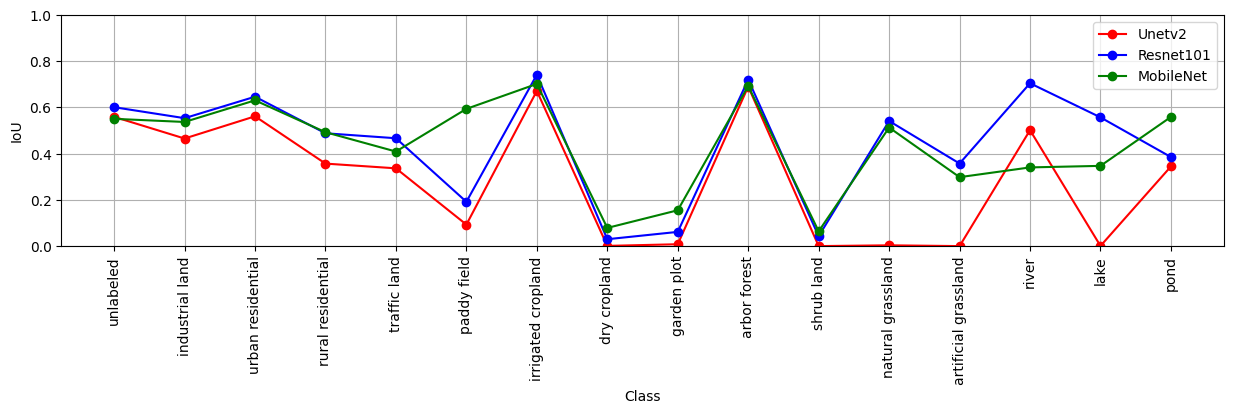

In [48]:
import matplotlib.pyplot as plt
# data = {'Unet': {'IoU': [], 'mIoU':x, ....}}
def plot_IoU_perclass(data):	
	labels = {
		0:"unlabeled",
		1:"industrial land",
		2:"urban residential",
		3:"rural residential",
		4:"traffic land",
		5:"paddy field",
		6:"irrigated cropland",
		7:"dry cropland",
		8:"garden plot",
		9:"arbor forest",
		10:"shrub land",
		11:"natural grassland",
		12:"artificial grassland",
		13:"river",
		14:"lake",
		15:"pond",
	}
	fig, ax = plt.subplots()
	fig.set_size_inches(15,3) 
	colors = ['red', 'blue', 'green']
	for i,net in enumerate(data.keys()):		
		perclass_IoU = data[net]['perclass_IoU']
		plt.plot(perclass_IoU, marker='o', color=colors[i], label=net)
	ax.legend()
	x_numbers = [_ for _ in range(len(labels.items()))]	
	plt.xticks(x_numbers, labels.values(), rotation=90)
	ax.set_xlabel("Class")
	ax.set_ylabel("IoU")
	plt.ylim(0,1)	
	plt.grid()
	plt.show()
plot_IoU_perclass(data)

	